In [1]:
import os
from IPython.display import Image, display
from lark import Lark, Transformer
from lark import tree as larkTree
from lark.indenter import Indenter

def display_tree(t, filename='viz.png'):
    larkTree.pydot__tree_to_png(t, filename)
    display(Image(filename))
    os.remove(filename)


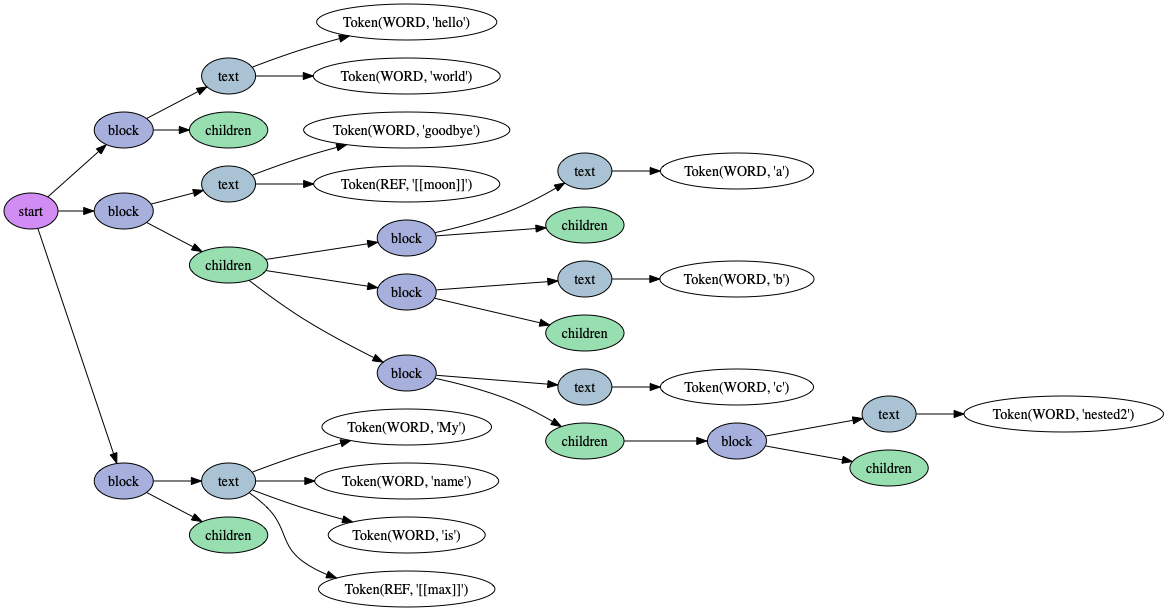

In [60]:


tree_grammar = r"""
    ?start: (_NL* block)+
    block: "- " text _NL children
    text: (WORD|REF)*
    children: [_INDENT block+ _DEDENT]
    REF: /\[\[/ WORD /\]\]/
    %import common.CNAME -> WORD
    %import common.WS_INLINE
    %declare _INDENT _DEDENT
    %ignore WS_INLINE
    _NL: /(\r?\n(\s)*)+/
"""

class TreeIndenter(Indenter):
    NL_type = '_NL'
    OPEN_PAREN_types = []
    CLOSE_PAREN_types = []
    INDENT_type = '_INDENT'
    DEDENT_type = '_DEDENT'
    tab_len = 4

class BasicTransformer(Transformer):
#     line = list
    pass
#     def block(self, items):
#         return items
    
parser = Lark(
    tree_grammar,
    parser='lalr',
    postlex=TreeIndenter(),
    transformer=BasicTransformer)

test_tree = """

- hello world
- goodbye [[moon]]
  - a
  - b
  - c
    - nested2
- My name is [[max]]

"""

t = parser.parse(test_tree)
display_tree(parser.parse(test_tree))

In [61]:

def parse_blocks(blocks, parent=None):
    results = []
    for block in blocks:
        blocktext = block.children[0]
        children = block.children[1].children
        children = parse_blocks(children)
        results.append({
            'text': blocktext.children,
            'children': children
        })
    return results
    
b = parse_blocks(t.children)
pprint(b)

[{'children': [], 'text': [Token(WORD, 'hello'), Token(WORD, 'world')]},
 {'children': [{'children': [], 'text': [Token(WORD, 'a')]},
               {'children': [], 'text': [Token(WORD, 'b')]},
               {'children': [{'children': [],
                              'text': [Token(WORD, 'nested2')]}],
                'text': [Token(WORD, 'c')]}],
  'text': [Token(WORD, 'goodbye'), Token(REF, '[[moon]]')]},
 {'children': [],
  'text': [Token(WORD, 'My'),
           Token(WORD, 'name'),
           Token(WORD, 'is'),
           Token(REF, '[[max]]')]}]
